In [2]:
print("hw")

hw
hw


In [1]:
from gnn_tracking.training.tc import TCModule
from pathlib import Path

model_exchange_path = Path(
    "/scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/model_exchange"
)
from gnn_tracking.utils.loading import TrackingDataModule

dm = TrackingDataModule(
    train=dict(
        dirs=[
            "/scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v5/part_1/"
        ],
        # If you run into memory issues, reduce this
    ),
    val=dict(
        dirs=[
            "/scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v5/part_9/"
        ],
        stop=5,
    ),
)
dm.setup(stage="fit")

[17:32:48] INFO: DataLoader will load 900 graphs (out of 900 available).
[17:32:48] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v5/part_1/data21000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v5/part_1/data21999_s0.pt
[17:32:48] INFO: DataLoader will load 5 graphs (out of 1000 available).
[17:32:48] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v5/part_9/data29000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v5/part_9/data29004_s0.pt


In [28]:
from gnn_tracking.graph_construction.k_scanner import GraphConstructionKNNScanner
from gnn_tracking.training.ml import MLModule

chkpt_path = model_exchange_path / "gc" / "eggplant-quail-of-tempest.ckpt"
lmodel = MLModule.load_from_checkpoint(chkpt_path)
lmodel.gc_scanner = GraphConstructionKNNScanner(ks=list(range(1, 10)))

[17:45:52] DEBUG: Getting class GraphConstructionFCNN from module gnn_tracking.models.graph_construction
[17:45:52] DEBUG: Getting class GraphConstructionHingeEmbeddingLoss from module gnn_tracking.metrics.losses
[17:45:52] DEBUG: Getting class GraphConstructionKNNScanner from module gnn_tracking.graph_construction.k_scanner


In [30]:
from gnn_tracking.models.graph_construction import MLGraphConstruction

gc = MLGraphConstruction(
    ml=lmodel.model,
    max_num_neighbors=5,
)

In [31]:
from pytorch_lightning import Trainer

trainer = Trainer(
    accelerator="cuda",
)
trainer.validate(model=lmodel, datamodule=dm)

/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3 ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
[17:46:08] INFO: DataLoader will load 5 graphs (out of 1000 available).
[17:46:08] DEBUG:

Validation: 0it [00:00, ?it/s]

NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃         Validate metric          ┃           DataLoader 0           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│            attractive            │       0.08885906636714935        │
│       attractive_weighted        │       0.08885906636714935        │
│ efficiency_at_max_frac_segment50 │        0.730103588104248         │
│    efficiency_at_segment50_80    │       0.22088126838207245        │
│    efficiency_at_segment50_85    │       0.24978384375572205        │
│    efficiency_at_segment50_88    │        0.2741009294986725        │
│    efficiency_at_segment50_90    │       0.29644519090652466        │
│    efficiency_at_segment50_93    │        0.348497599363327         │
│    efficiency_at_segment50_95    │       0.41066500544548035        │
│    efficiency_at_segment50_97    │        0.5469865202903748        │
│    efficiency_at_segment50_99    │               nan                │
│  frac100_at_max_frac_segment50   │        0.9340818616049529        │
│     frac100_at_segment50_80      │        0.4705219864845276        │
│     frac100_at_segment50_85      │        0.5390644669532776        │
│     frac100_at_segment50_88      │        0.5914136171340942        │
│     frac100_at_segment50_90      │        0.6353813409805298        │
│     frac100_at_segment50_93      │        0.7230911254882812        │
│     frac100_at_segment50_95      │        0.8003661632537842        │
│     frac100_at_segment50_97      │        0.8824720978736877        │
│     frac100_at_segment50_99      │               nan                │
│   frac75_at_max_frac_segment50   │        0.9574594628727084        │
│      frac75_at_segment50_80      │        0.5707942843437195        │
│      frac75_at_segment50_85      │        0.6392933130264282        │
│      frac75_at_segment50_88      │        0.6887759566307068        │
│      frac75_at_segment50_90      │        0.728486180305481         │
│      frac75_at_segment50_93      │        0.803777277469635         │
│      frac75_at_segment50_95      │        0.8661441206932068        │
│      frac75_at_segment50_97      │        0.9253695011138916        │
│      frac75_at_segment50_99      │               nan                │
│     k_at_max_frac_segment50      │               9.0                │
│        k_at_segment50_80         │        1.987536907196045         │
│        k_at_segment50_85         │        2.2700655460357666        │
│        k_at_segment50_88         │        2.5128278732299805        │
│        k_at_segment50_90         │         2.7406165599823          │
│        k_at_segment50_93         │        3.292621374130249         │
│        k_at_segment50_95         │        4.0000715255737305        │
│        k_at_segment50_97         │        5.806241512298584         │
│        k_at_segment50_99         │               nan                │
│        max_frac_segment50        │        0.9858999164956848        │
│    n_edges_frac_segment50_80     │          111307.8046875          │
│    n_edges_frac_segment50_85     │          126948.671875           │
│    n_edges_frac_segment50_88     │           140366.03125           │
│    n_edges_frac_segment50_90     │          152939.671875           │
│    n_edges_frac_segment50_93     │          183357.171875           │
│    n_edges_frac_segment50_95     │          222248.328125           │
│    n_edges_frac_segment50_97     │           321112.90625           │
│    n_edges_frac_segment50_99     │               nan                │
│    n_edges_max_frac_segment50    │             494430.4             │
│   purity_at_max_frac_segment50   │        0.4073466956615448        │
│      purity_at_segment50_80      │        0.6334602236747742        │
│      purity_at_segment50_85      │        0.6207960844039917        │
│      purity_at_segment50_88      │        0.6107168793678284        │
│      purity_at_segment50_90      │    

[{'attractive': 0.08885906636714935,
  'repulsive': 12.756551742553711,
  'attractive_weighted': 0.08885906636714935,
  'repulsive_weighted': 0.0765393078327179,
  'total': 0.16539837419986725,
  'n_edges_frac_segment50_80': 111307.8046875,
  'k_at_segment50_80': 1.987536907196045,
  'frac75_at_segment50_80': 0.5707942843437195,
  'frac100_at_segment50_80': 0.4705219864845276,
  'efficiency_at_segment50_80': 0.22088126838207245,
  'purity_at_segment50_80': 0.6334602236747742,
  'n_edges_frac_segment50_85': 126948.671875,
  'k_at_segment50_85': 2.2700655460357666,
  'frac75_at_segment50_85': 0.6392933130264282,
  'frac100_at_segment50_85': 0.5390644669532776,
  'efficiency_at_segment50_85': 0.24978384375572205,
  'purity_at_segment50_85': 0.6207960844039917,
  'n_edges_frac_segment50_88': 140366.03125,
  'k_at_segment50_88': 2.5128278732299805,
  'frac75_at_segment50_88': 0.6887759566307068,
  'frac100_at_segment50_88': 0.5914136171340942,
  'efficiency_at_segment50_88': 0.2741009294986

In [34]:
import pandas as pd
from matplotlib import pyplot as plt


class GCEffsVsKPlot:
    def __init__(self, df: pd.DataFrame, *, model=""):
        self.df = df
        _, self.ax = plt.subplots()
        self.ax.set_xlabel("$k$")
        self.ax.set_title(f"{model=}")

    def add_var(self, v: str):
        self.ax.plot("k", v, data=self.df, label=v, marker="o")

    def add_legend(self):
        self.ax.legend()

    def plot(self):
        for v in ["frac50", "frac75", "frac100", "efficiency", "purity"]:
            self.add_var(v)
        self.ax.legend()

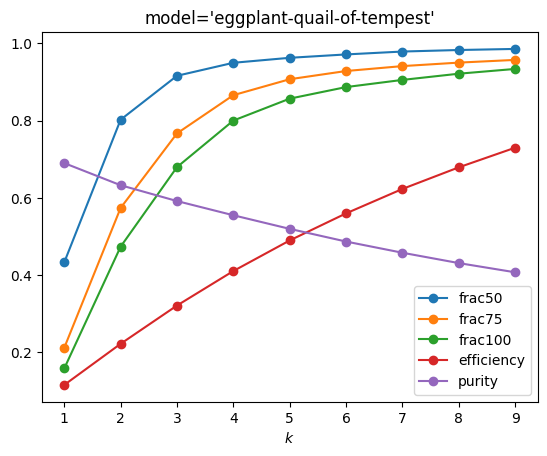

In [35]:
GCEffsVsKPlot(lmodel.gc_scanner.get_results().df, model=chkpt_path.stem).plot()

In [32]:
class GCNEdgesVsKPlot:
    def __init__(self, df: pd.DataFrame, *, model=""):
        self.df = df
        _, self.ax = plt.subplots()
        self.ax.set_xlabel("$k$")
        self.ax.set_ylabel("Number of edges")
        self.ax.set_title(f"{model=}")

    def plot(self):
        self.ax.plot("k", "n_edges", data=self.df, marker="o")

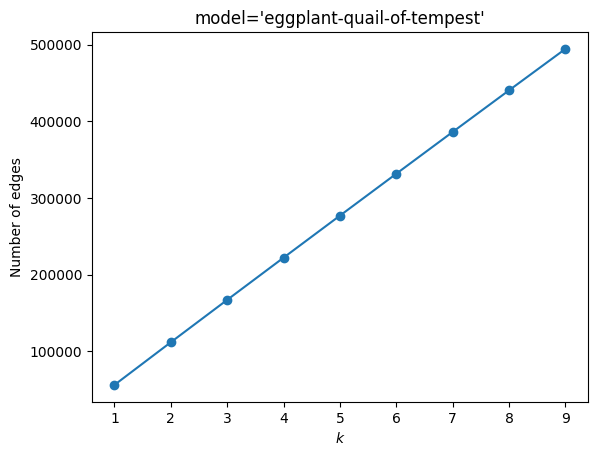

In [33]:
GCNEdgesVsKPlot(lmodel.gc_scanner.get_results().df, model=chkpt_path.stem).plot()